# Versão 2 dos testes realizados para o modelo


In [38]:
import pandas as pd
import os, re, io
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression


In [39]:
# Lê as propostas com o Pandas
propostas = pd.read_csv("../../production/data_extraction/propostas.csv")

propostas  # Impressão do DataFrame de propostas

,Categoria,Texto
0,Turismo,Turismo: esse é o Destino. <p><strong>Objetivo...
1,Desenvolvimento Agrário e Agricultura Familiar,Agricultura Familiar e Agroecologia. <p><stron...
2,Agricultura e Pecuária,Agropecuária Sustentável. <p>Objetivo: Contrib...
3,Saúde,Atenção Primária à Saúde. <p>Fortalecer a Aten...
4,Saúde,Atenção Especializada à Saúde. <p>Ampliar o ac...
...,...,...
8431,Saúde,Microchipagem de animais de companhia. Microch...
8432,Secretaria Geral da Presidência da República,"Direito a atendimento eficiente, é um direito..."
8433,Previdência Social,Rever Reforma da Previdência. Rever a reforma ...
8434,Meio Ambiente e Mudança do Clima,Preservação da Serra do Espinhaço. A Serra do ...


In [40]:
# Expressões regulares para remoção de poluição de dados nos textos 
# REGX_URL = r"https?://[A-Za-z0-9./\-]+" # Regex for URLs
REGX_HTML = r"<[^<]+?>" # Regex for HTML tags
REGX_ENDING = r'Órgão Responsável:.+' # Regex for the part of the text

In [41]:
# Função para pré-processamento
def preprocessing(text):
  # text = text.lower()

  text = re.sub(REGX_HTML, '', text)  # Removendo tags HTML
  # text = re.sub(REGX_URL, '', text) # Revomendo URLs
  text = re.sub(REGX_ENDING, '', text)

  # tokens = [t.lemma_ for t in nlp(text) if t not in STOP_WORDS and not t.is_punct]

  return text

#  Ajustando textos da coluna Corpo
propostas['Texto'] = propostas['Texto'].apply(preprocessing)
propostas.head()

,Categoria,Texto
0,Turismo,Turismo: esse é o Destino. Objetivo: Posiciona...
1,Desenvolvimento Agrário e Agricultura Familiar,Agricultura Familiar e Agroecologia. Objetivo:...
2,Agricultura e Pecuária,Agropecuária Sustentável. Objetivo: Contribuir...
3,Saúde,Atenção Primária à Saúde. Fortalecer a Atenção...
4,Saúde,Atenção Especializada à Saúde. Ampliar o acess...


In [42]:
from sklearn.model_selection import train_test_split

treino, teste, classe_treino, classe_teste = train_test_split(propostas.Texto,
                                                              propostas.Categoria,
                                                              random_state = 42)



In [43]:
treino

3889    Hospital veterinário pelo Sus nas cidades e es...
838     Educação com qualidade.. Salas de aulas com me...
8365    Direito na escola . Criação da disciplina de d...
5060    Sugestão para Instrução Normativa. Instituto B...
6310    Tornar obrigatório o seguro automotivo . Em pa...
                              ...                        
5734    Empreendedorismo, inovação e propriedade intel...
5191    Mudar a forma de trabalho de conclusão de curs...
5390    Banco de Projetos de Produção para Pequeno Pro...
860     Realizar a Conferência Nacional da Gestão e In...
7270    Loas e bpc sem renda precpta. Nasce uma crianç...
Name: Texto, Length: 6327, dtype: object

In [44]:
classe_treino


3889                     Meio Ambiente e Mudança do Clima
838                                              Educação
8365                                             Educação
5060               Gestão e Inovação em Serviços Públicos
6310         Secretaria Geral da Presidência da República
                              ...                        
5734                       Ciência, Tecnologia e Inovação
5191                                             Educação
5390       Desenvolvimento Agrário e Agricultura Familiar
860                Gestão e Inovação em Serviços Públicos
7270    Desenvolvimento e Assistência Social, Família ...
Name: Categoria, Length: 6327, dtype: object

In [45]:
print(propostas.Categoria.value_counts())

Categoria
Saúde                                                             1368
Educação                                                          1261
Direitos Humanos e Cidadania                                       528
Meio Ambiente e Mudança do Clima                                   497
Transportes                                                        473
Desenvolvimento e Assistência Social, Família e Combate à Fome     418
Trabalho e Emprego                                                 377
Justiça e Segurança Pública                                        342
Cidades                                                            294
Gestão e Inovação em Serviços Públicos                             284
Desenvolvimento Agrário e Agricultura Familiar                     255
Previdência Social                                                 249
Cultura                                                            224
Mulheres                                                           

In [46]:
propostas['Texto'][0]

'Turismo: esse é o Destino. Objetivo: Posicionar o turismo como vetor de desenvolvimento sustentável e aumentar a competitividade dos destinos e produtos turísticos brasileiros, democratizando o acesso à atividade turística aos cidadãos brasileiros.'

In [47]:
#Criando índices para as categorias
cats = propostas['Categoria'].unique() # Pegando cada categoria única
cats = dict(enumerate(cats, 0)) # Convertendo para dict (com índices enumerados)
cats = {v:k for k,v in cats.items()}  # Trocando chaves e valores

propostas['id_cats'] = propostas['Categoria'].map(cats) # Inserindo coluna de índices das cats
propostas.head()

,Categoria,Texto,id_cats
0,Turismo,Turismo: esse é o Destino. Objetivo: Posiciona...,0
1,Desenvolvimento Agrário e Agricultura Familiar,Agricultura Familiar e Agroecologia. Objetivo:...,1
2,Agricultura e Pecuária,Agropecuária Sustentável. Objetivo: Contribuir...,2
3,Saúde,Atenção Primária à Saúde. Fortalecer a Atenção...,3
4,Saúde,Atenção Especializada à Saúde. Ampliar o acess...,3


In [48]:
regressao_logistica = LogisticRegression(solver = "lbfgs",max_iter=1000)

def classificar_texto(texto, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                              texto[coluna_classificacao],
                                                              random_state = 42)
    regressao_logistica.fit(treino, classe_treino)
    return regressao_logistica.score(teste, classe_teste)

acuracia_bruta = classificar_texto(propostas, "Texto", "id_cats")

print(acuracia_bruta)



0.267425320056899


In [49]:
%matplotlib inline
from wordcloud import WordCloud
import matplotlib.pyplot as plt

todas_palavras = ' '.join([texto for texto in propostas.Texto])


In [50]:
import nltk
from nltk import tokenize

# realiza a tokenização do texto
token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(todas_palavras)

frequencia = nltk.FreqDist(token_frase)
df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                   "Frequência": list(frequencia.values())})



In [51]:
# imprime um data frame com as palavras ordenadas pelas q tem a maior frequencia
df_frequencia.nlargest(columns = "Frequência", n = 10)

,Palavra,Frequência
10,de,30598
13,e,20884
15,a,13139
49,para,10234
66,do,8548
3,o,8537
515,que,8240
51,da,7868
36,em,5927
43,com,5817


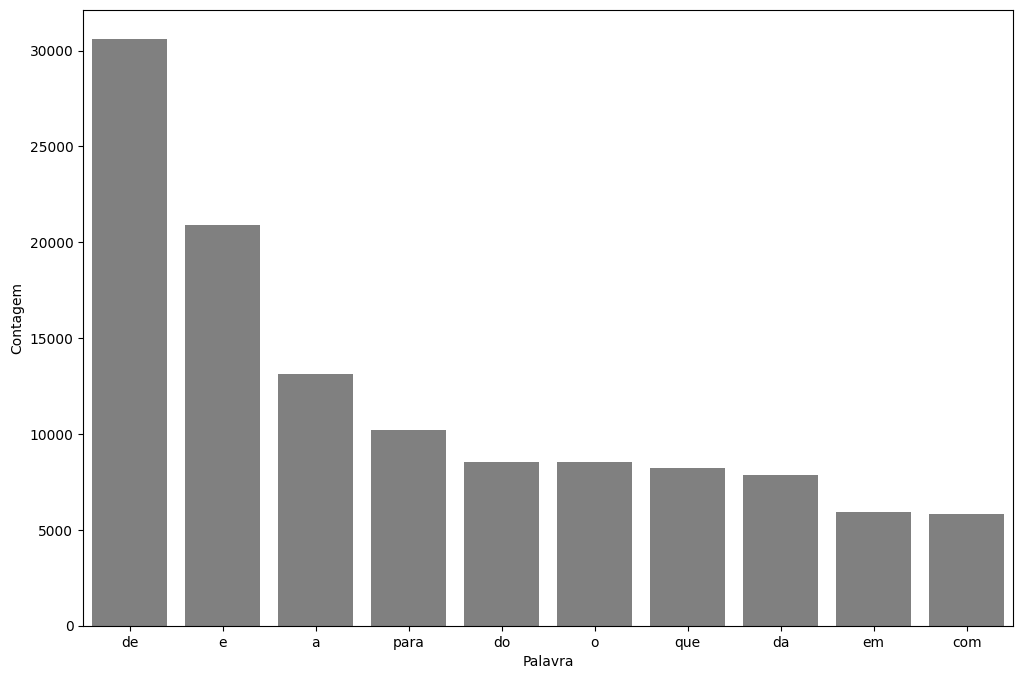

In [52]:
import seaborn as sns

def pareto(texto, coluna_texto, quantidade):
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    token_frase = token_espaco.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token_frase)
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                   "Frequência": list(frequencia.values())})
    df_frequencia = df_frequencia.nlargest(columns = "Frequência", n = quantidade)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequencia, x = "Palavra", y = "Frequência", color = 'gray')
    ax.set(ylabel = "Contagem")
    plt.show()

pareto(propostas, "Texto", 10)

In [53]:
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")

frase_processada = list()
for opiniao in propostas.Texto:
    nova_frase = list()
    palavras_texto = token_espaco.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

propostas["tratamento_1"] = frase_processada


In [54]:
propostas.head()

,Categoria,Texto,id_cats,tratamento_1
0,Turismo,Turismo: esse é o Destino. Objetivo: Posiciona...,0,Turismo: Destino. Objetivo: Posicionar turismo...
1,Desenvolvimento Agrário e Agricultura Familiar,Agricultura Familiar e Agroecologia. Objetivo:...,1,Agricultura Familiar Agroecologia. Objetivo: F...
2,Agricultura e Pecuária,Agropecuária Sustentável. Objetivo: Contribuir...,2,Agropecuária Sustentável. Objetivo: Contribuir...
3,Saúde,Atenção Primária à Saúde. Fortalecer a Atenção...,3,Atenção Primária Saúde. Fortalecer Atenção Pri...
4,Saúde,Atenção Especializada à Saúde. Ampliar o acess...,3,Atenção Especializada Saúde. Ampliar acesso aç...


In [55]:
acuracia_tratamento_1 = classificar_texto(propostas, "tratamento_1", "id_cats")
print(acuracia_tratamento_1)

0.3409198672356567


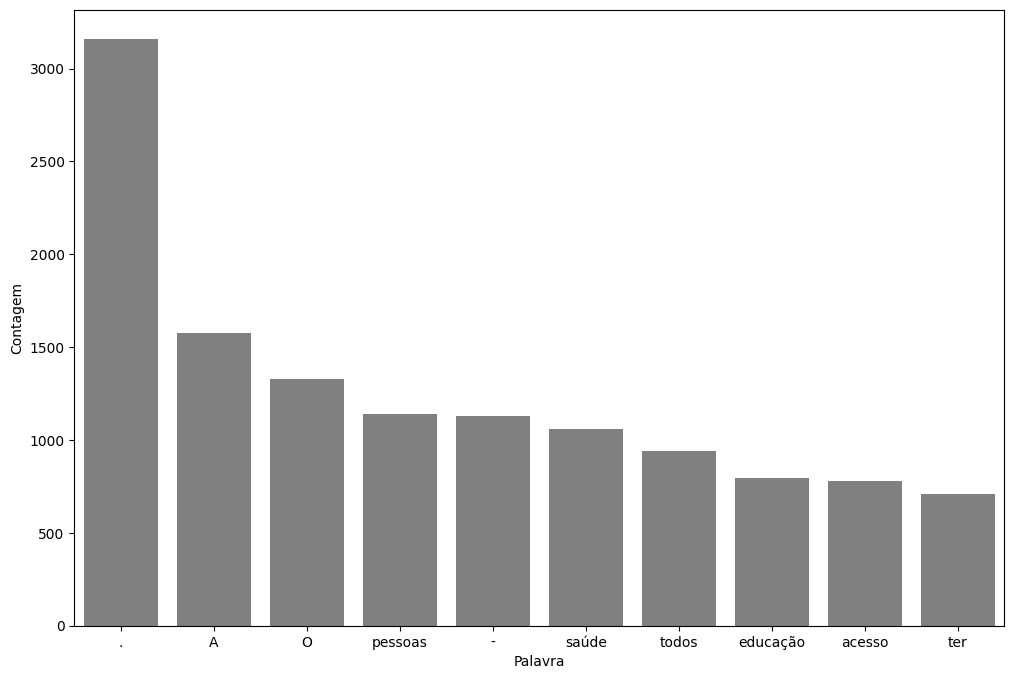

In [56]:
pareto(propostas,"tratamento_1", 10)

In [57]:
from string import punctuation

token_pontuacao = tokenize.WordPunctTokenizer()

pontuacao = list()
for ponto in punctuation:
    pontuacao.append(ponto)

pontuacao_stopwords = pontuacao + palavras_irrelevantes

frase_processada = list()
for opiniao in propostas["tratamento_1"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

propostas["tratamento_2"] = frase_processada



In [58]:
propostas.head()

,Categoria,Texto,id_cats,tratamento_1,tratamento_2
0,Turismo,Turismo: esse é o Destino. Objetivo: Posiciona...,0,Turismo: Destino. Objetivo: Posicionar turismo...,Turismo Destino Objetivo Posicionar turismo ve...
1,Desenvolvimento Agrário e Agricultura Familiar,Agricultura Familiar e Agroecologia. Objetivo:...,1,Agricultura Familiar Agroecologia. Objetivo: F...,Agricultura Familiar Agroecologia Objetivo For...
2,Agricultura e Pecuária,Agropecuária Sustentável. Objetivo: Contribuir...,2,Agropecuária Sustentável. Objetivo: Contribuir...,Agropecuária Sustentável Objetivo Contribuir d...
3,Saúde,Atenção Primária à Saúde. Fortalecer a Atenção...,3,Atenção Primária Saúde. Fortalecer Atenção Pri...,Atenção Primária Saúde Fortalecer Atenção Prim...
4,Saúde,Atenção Especializada à Saúde. Ampliar o acess...,3,Atenção Especializada Saúde. Ampliar acesso aç...,Atenção Especializada Saúde Ampliar acesso açõ...


In [59]:
acuracia_tratamento2 = classificar_texto(propostas, "tratamento_2", "id_cats")
print(acuracia_tratamento2)


0.3409198672356567


In [60]:
propostas["tratamento_1"][0]

'Turismo: Destino. Objetivo: Posicionar turismo vetor desenvolvimento sustentável aumentar competitividade destinos produtos turísticos brasileiros, democratizando acesso atividade turística cidadãos brasileiros.'

In [61]:
propostas["tratamento_2"][0]

'Turismo Destino Objetivo Posicionar turismo vetor desenvolvimento sustentável aumentar competitividade destinos produtos turísticos brasileiros democratizando acesso atividade turística cidadãos brasileiros'

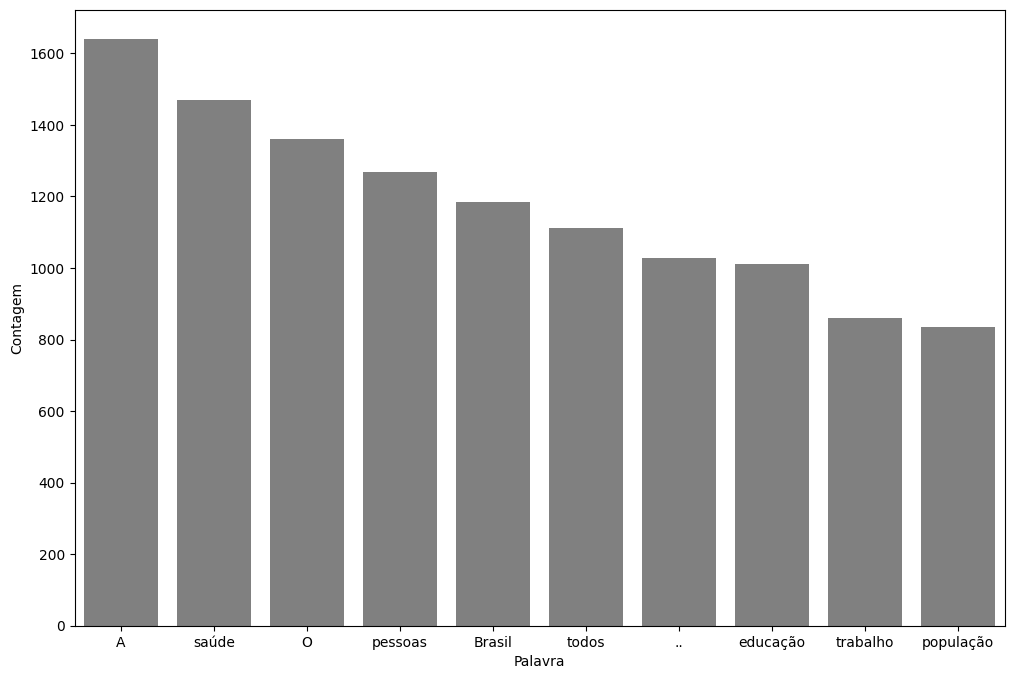

In [62]:
pareto(propostas,"tratamento_2", 10)

In [63]:
import unidecode 

sem_acentos = [unidecode.unidecode(texto) for texto in propostas["tratamento_2"]]


In [64]:
sem_acentos[0]

'Turismo Destino Objetivo Posicionar turismo vetor desenvolvimento sustentavel aumentar competitividade destinos produtos turisticos brasileiros democratizando acesso atividade turistica cidadaos brasileiros'

In [65]:
stopwords_sem_acento = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]

In [66]:
stopwords_sem_acento

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 'a',
 'a',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'as',
 'ate',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'e',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'eramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'esta',
 'estamos',
 'estao',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estavamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estiveramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivessemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'foramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fossemos',
 'fui',
 'ha',
 'haja

In [67]:
propostas["tratamento_3"] = sem_acentos

frase_processada = list()
for opiniao in propostas["tratamento_3"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

propostas["tratamento_3"] = frase_processada



In [68]:
propostas.head()

,Categoria,Texto,id_cats,tratamento_1,tratamento_2,tratamento_3
0,Turismo,Turismo: esse é o Destino. Objetivo: Posiciona...,0,Turismo: Destino. Objetivo: Posicionar turismo...,Turismo Destino Objetivo Posicionar turismo ve...,Turismo Destino Objetivo Posicionar turismo ve...
1,Desenvolvimento Agrário e Agricultura Familiar,Agricultura Familiar e Agroecologia. Objetivo:...,1,Agricultura Familiar Agroecologia. Objetivo: F...,Agricultura Familiar Agroecologia Objetivo For...,Agricultura Familiar Agroecologia Objetivo For...
2,Agricultura e Pecuária,Agropecuária Sustentável. Objetivo: Contribuir...,2,Agropecuária Sustentável. Objetivo: Contribuir...,Agropecuária Sustentável Objetivo Contribuir d...,Agropecuaria Sustentavel Objetivo Contribuir d...
3,Saúde,Atenção Primária à Saúde. Fortalecer a Atenção...,3,Atenção Primária Saúde. Fortalecer Atenção Pri...,Atenção Primária Saúde Fortalecer Atenção Prim...,Atencao Primaria Saude Fortalecer Atencao Prim...
4,Saúde,Atenção Especializada à Saúde. Ampliar o acess...,3,Atenção Especializada Saúde. Ampliar acesso aç...,Atenção Especializada Saúde Ampliar acesso açõ...,Atencao Especializada Saude Ampliar acesso aco...


In [69]:
acuracia_tratamento3 = classificar_texto(propostas, "tratamento_3", "id_cats")
print(acuracia_tratamento3)



0.3432906590801328


In [70]:
#deixa todas as letras minusculas
frase_processada = list()
for opiniao in propostas["tratamento_3"]:
    nova_frase = list()
    opiniao = opiniao.lower()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acento:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

propostas["tratamento_4"] = frase_processada

In [71]:
propostas["tratamento_3"][0]

'Turismo Destino Objetivo Posicionar turismo vetor desenvolvimento sustentavel aumentar competitividade destinos produtos turisticos brasileiros democratizando acesso atividade turistica cidadaos brasileiros'

In [72]:
propostas["tratamento_4"][0]

'turismo destino objetivo posicionar turismo vetor desenvolvimento sustentavel aumentar competitividade destinos produtos turisticos brasileiros democratizando acesso atividade turistica cidadaos brasileiros'

In [73]:
acuracia_tratamento4 = classificar_texto(propostas, "tratamento_4", "id_cats")
print(acuracia_tratamento4)


0.3703176861071598


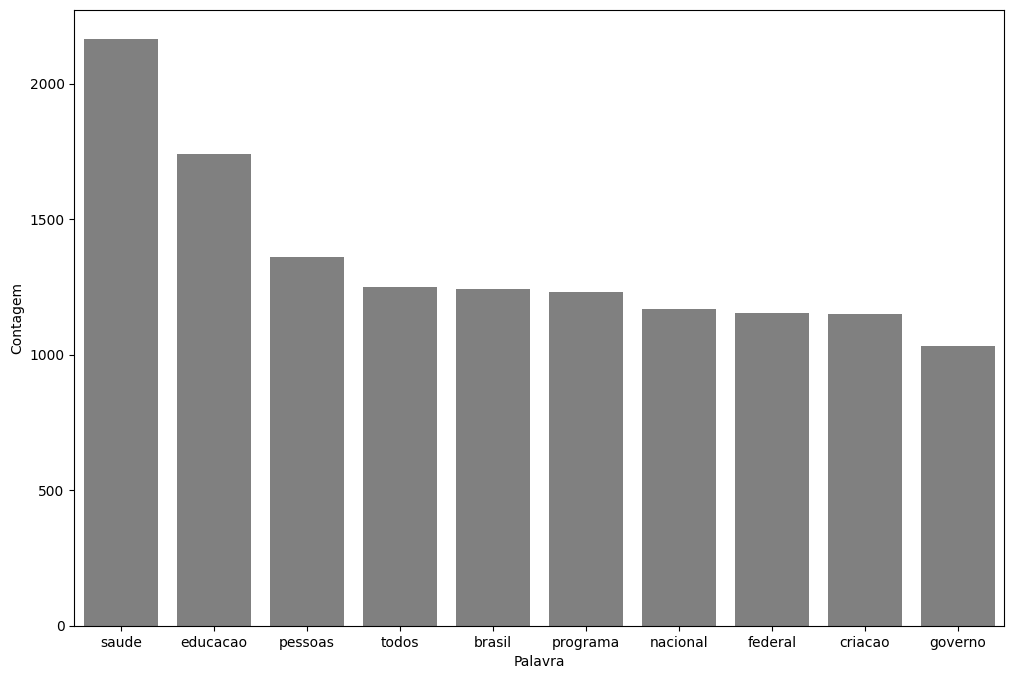

In [74]:
pareto(propostas, "tratamento_4", 10)

# Teste com a Stemização


In [75]:
nltk.download('rslp')
# faz a stemetizacao
stemmer = nltk.RSLPStemmer()

[nltk_data] Downloading package rslp to /home/leandro/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


In [76]:
frase_processada = list()
for opiniao in propostas["tratamento_4"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acento:
            nova_frase.append(stemmer.stem(palavra))
    frase_processada.append(' '.join(nova_frase))

propostas["tratamento_5"] = frase_processada


In [77]:
acuracia_tratamento5 = classificar_texto(propostas, "tratamento_5", "id_cats")
print(acuracia_tratamento5)

0.3845424371740161


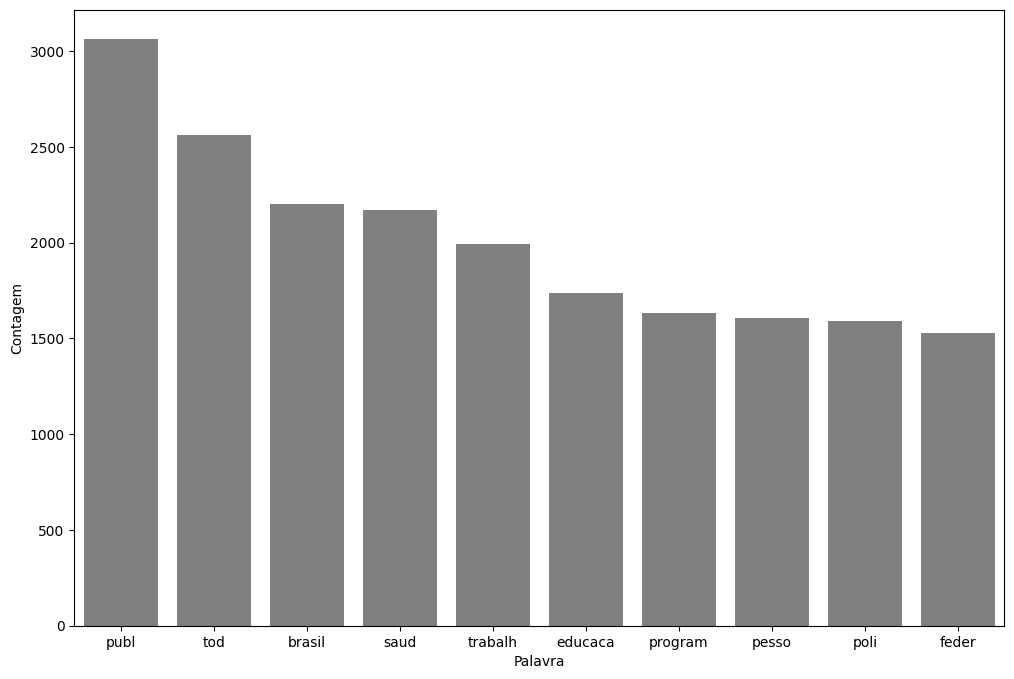

In [78]:
pareto(propostas, "tratamento_5", 10)

# Testando a utilização do TF-IDF no dataframe

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(lowercase=False, max_features=50)

tfidf_tratados = tfidf.fit_transform(propostas["tratamento_5"])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf_tratados,
                                                              propostas["id_cats"],
                                                              random_state = 42)
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_tratados = regressao_logistica.score(teste, classe_teste)

print(acuracia_tfidf_tratados)



0.3878615457562826


# Testando a utilizacao do TF-IDF juntamente com o ngrams


In [80]:
from nltk import ngrams

#acuracia do tfidf utilizando os ngrams
tfidf = TfidfVectorizer(lowercase=False, ngram_range = (1,2))
vetor_tfidf = tfidf.fit_transform(propostas["tratamento_5"])
treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf,
                                                              propostas["id_cats"],
                                                              random_state = 42)
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf_ngrams)


0.5462304409672831


In [81]:
#palavras que o modelo aprendeu da categoria saude (id_cats 3)
pesos = pd.DataFrame(
    regressao_logistica.coef_[3].T,
    index = tfidf.get_feature_names_out()
)

pesos.nlargest(50,0)



,0
saud,9.159960
su,5.623231
enferm,4.474516
medic,4.232515
atend,3.622089
hospit,3.583225
doenc,3.470558
paci,3.436469
pis,3.142097
trat,2.662846


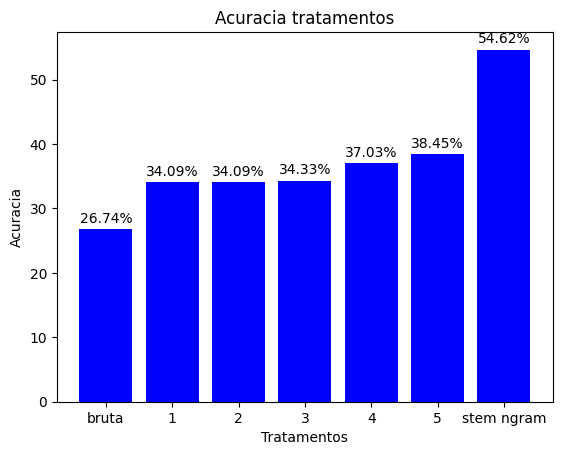

In [82]:
import matplotlib.pyplot as plt

# Dados numéricos
dados = [acuracia_bruta * 100, acuracia_tratamento_1 * 100, acuracia_tratamento2 * 100,
         acuracia_tratamento3 * 100, acuracia_tratamento4 * 100, acuracia_tratamento5 * 100,
         acuracia_tfidf_ngrams * 100]
etiquetas = ['bruta', '1', '2', '3', '4', '5', 'stem ngram']

# Criar o gráfico de barras
plt.bar(etiquetas, dados, color='blue')

# Adicionar título e rótulos dos eixos
plt.title('Acuracia tratamentos')
plt.xlabel('Tratamentos')
plt.ylabel('Acuracia')

# Adicionar os valores acima de cada barra
for i, valor in enumerate(dados):
    plt.text(i, valor + 1, f'{valor:.2f}%', ha='center')

# Exibir o gráfico
plt.show()


# Testando com o SVM utilizando o tratamento 4 ou seja sem a stemizacao


In [83]:
propostas.head()

,Categoria,Texto,id_cats,tratamento_1,tratamento_2,tratamento_3,tratamento_4,tratamento_5
0,Turismo,Turismo: esse é o Destino. Objetivo: Posiciona...,0,Turismo: Destino. Objetivo: Posicionar turismo...,Turismo Destino Objetivo Posicionar turismo ve...,Turismo Destino Objetivo Posicionar turismo ve...,turismo destino objetivo posicionar turismo ve...,tur destin obje posic tur vet desenvolv susten...
1,Desenvolvimento Agrário e Agricultura Familiar,Agricultura Familiar e Agroecologia. Objetivo:...,1,Agricultura Familiar Agroecologia. Objetivo: F...,Agricultura Familiar Agroecologia Objetivo For...,Agricultura Familiar Agroecologia Objetivo For...,agricultura familiar agroecologia objetivo for...,agricult famili agroecolog obje fortalec agric...
2,Agricultura e Pecuária,Agropecuária Sustentável. Objetivo: Contribuir...,2,Agropecuária Sustentável. Objetivo: Contribuir...,Agropecuária Sustentável Objetivo Contribuir d...,Agropecuaria Sustentavel Objetivo Contribuir d...,agropecuaria sustentavel objetivo contribuir d...,agropecu sustenta obje contribu desenvolv set ...
3,Saúde,Atenção Primária à Saúde. Fortalecer a Atenção...,3,Atenção Primária Saúde. Fortalecer Atenção Pri...,Atenção Primária Saúde Fortalecer Atenção Prim...,Atencao Primaria Saude Fortalecer Atencao Prim...,atencao primaria saude fortalecer atencao prim...,atenca prim saud fortalec atenca prim saud amp...
4,Saúde,Atenção Especializada à Saúde. Ampliar o acess...,3,Atenção Especializada Saúde. Ampliar acesso aç...,Atenção Especializada Saúde Ampliar acesso açõ...,Atencao Especializada Saude Ampliar acesso aco...,atencao especializada saude ampliar acesso aco...,atenca especi saud ampli acess aco serv atenca...


In [84]:
import spacy
from spacy.lang.pt.stop_words import STOP_WORDS

nlp = spacy.load("pt_core_news_sm") 

In [85]:
#  Representações vetoriais do texto
propostas['Vector'] = propostas['tratamento_4'].apply(lambda text: nlp(text).vector)
propostas.head()

,Categoria,Texto,id_cats,tratamento_1,tratamento_2,tratamento_3,tratamento_4,tratamento_5,Vector
0,Turismo,Turismo: esse é o Destino. Objetivo: Posiciona...,0,Turismo: Destino. Objetivo: Posicionar turismo...,Turismo Destino Objetivo Posicionar turismo ve...,Turismo Destino Objetivo Posicionar turismo ve...,turismo destino objetivo posicionar turismo ve...,tur destin obje posic tur vet desenvolv susten...,"[0.5342788, -0.02215004, -1.2641032, 1.0001749..."
1,Desenvolvimento Agrário e Agricultura Familiar,Agricultura Familiar e Agroecologia. Objetivo:...,1,Agricultura Familiar Agroecologia. Objetivo: F...,Agricultura Familiar Agroecologia Objetivo For...,Agricultura Familiar Agroecologia Objetivo For...,agricultura familiar agroecologia objetivo for...,agricult famili agroecolog obje fortalec agric...,"[-1.2358813, 1.6805391, -1.060905, 1.7490906, ..."
2,Agricultura e Pecuária,Agropecuária Sustentável. Objetivo: Contribuir...,2,Agropecuária Sustentável. Objetivo: Contribuir...,Agropecuária Sustentável Objetivo Contribuir d...,Agropecuaria Sustentavel Objetivo Contribuir d...,agropecuaria sustentavel objetivo contribuir d...,agropecu sustenta obje contribu desenvolv set ...,"[-0.82804227, 0.28899813, -1.0518178, 0.757611..."
3,Saúde,Atenção Primária à Saúde. Fortalecer a Atenção...,3,Atenção Primária Saúde. Fortalecer Atenção Pri...,Atenção Primária Saúde Fortalecer Atenção Prim...,Atencao Primaria Saude Fortalecer Atencao Prim...,atencao primaria saude fortalecer atencao prim...,atenca prim saud fortalec atenca prim saud amp...,"[-1.656974, 0.9785775, -0.17303438, 2.8001835,..."
4,Saúde,Atenção Especializada à Saúde. Ampliar o acess...,3,Atenção Especializada Saúde. Ampliar acesso aç...,Atenção Especializada Saúde Ampliar acesso açõ...,Atencao Especializada Saude Ampliar acesso aco...,atencao especializada saude ampliar acesso aco...,atenca especi saud ampli acess aco serv atenca...,"[0.14726149, 0.8421647, 0.023294887, 1.8071848..."


In [86]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm, model_selection
import numpy as np


In [87]:
# Separação dos dados para treinamento e teste
treino, teste, classe_treino, classe_teste = model_selection.train_test_split(
    propostas.Vector.values,
    propostas.Categoria,
    test_size=0.2
)

# Transformação: conversão do tipo dos dados de entrada (X) para interpretação
treino_2d = np.stack(treino)
teste_2d = np.stack(teste)

# Transformação: escalonamento dos dados numéricos (normalizados entre 0 e 1)
# Para tratamento de casos outliers
scaler = MinMaxScaler()
scaled_train_embed = scaler.fit_transform(treino_2d)
scaled_test_embed = scaler.transform(teste_2d)

In [95]:
import json

# Treinamento
clf = svm.SVC() # Instanciando modelo
clf.fit(scaled_train_embed, classe_treino)  # Realização do treinamento passando os dados

classe_pred = clf.predict(scaled_test_embed) # Predição com os dados de teste

# Salvando relatório de treinamento em um arquivo JSON
json_obj = json.dumps(classification_report(classe_teste, classe_pred, output_dict=True), indent=4)
save_file = open('teste_results.json', 'w').write(json_obj)

# Impressão do relatório com as métricas do modelo (para cada cat.)
print(classification_report(classe_teste, classe_pred))  

predictions_SVM = clf.predict(scaled_test_embed)
print("SVM Accuracy Score -> ", accuracy_score(predictions_SVM, classe_teste)*100)  # Impressão da precisão geral

/home/leandro/Documentos/07_ProcessamentoLinguagemNatural/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/leandro/Documentos/07_ProcessamentoLinguagemNatural/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/leandro/Documentos/07_ProcessamentoLinguagemNatural/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` pa

                                                                precision    recall  f1-score   support

                                      Advocacia-Geral da União       0.00      0.00      0.00         3
                                        Agricultura e Pecuária       0.00      0.00      0.00        13
                                                 Banco Central       0.00      0.00      0.00         3
                                                    Casa Civil       0.00      0.00      0.00         9
                                                       Cidades       0.00      0.00      0.00        58
                                Ciência, Tecnologia e Inovação       0.00      0.00      0.00        32
                                            Comunicação Social       0.00      0.00      0.00         9
                                                  Comunicações       0.00      0.00      0.00        15
                                  Controladoria-Geral da União 

# Teste da regressao logistica com a lematizacao usando o spacy

In [96]:
propostas.head()

,Categoria,Texto,id_cats,tratamento_1,tratamento_2,tratamento_3,tratamento_4,tratamento_5,Vector
0,Turismo,Turismo: esse é o Destino. Objetivo: Posiciona...,0,Turismo: Destino. Objetivo: Posicionar turismo...,Turismo Destino Objetivo Posicionar turismo ve...,Turismo Destino Objetivo Posicionar turismo ve...,turismo destino objetivo posicionar turismo ve...,tur destin obje posic tur vet desenvolv susten...,"[0.5342788, -0.02215004, -1.2641032, 1.0001749..."
1,Desenvolvimento Agrário e Agricultura Familiar,Agricultura Familiar e Agroecologia. Objetivo:...,1,Agricultura Familiar Agroecologia. Objetivo: F...,Agricultura Familiar Agroecologia Objetivo For...,Agricultura Familiar Agroecologia Objetivo For...,agricultura familiar agroecologia objetivo for...,agricult famili agroecolog obje fortalec agric...,"[-1.2358813, 1.6805391, -1.060905, 1.7490906, ..."
2,Agricultura e Pecuária,Agropecuária Sustentável. Objetivo: Contribuir...,2,Agropecuária Sustentável. Objetivo: Contribuir...,Agropecuária Sustentável Objetivo Contribuir d...,Agropecuaria Sustentavel Objetivo Contribuir d...,agropecuaria sustentavel objetivo contribuir d...,agropecu sustenta obje contribu desenvolv set ...,"[-0.82804227, 0.28899813, -1.0518178, 0.757611..."
3,Saúde,Atenção Primária à Saúde. Fortalecer a Atenção...,3,Atenção Primária Saúde. Fortalecer Atenção Pri...,Atenção Primária Saúde Fortalecer Atenção Prim...,Atencao Primaria Saude Fortalecer Atencao Prim...,atencao primaria saude fortalecer atencao prim...,atenca prim saud fortalec atenca prim saud amp...,"[-1.656974, 0.9785775, -0.17303438, 2.8001835,..."
4,Saúde,Atenção Especializada à Saúde. Ampliar o acess...,3,Atenção Especializada Saúde. Ampliar acesso aç...,Atenção Especializada Saúde Ampliar acesso açõ...,Atencao Especializada Saude Ampliar acesso aco...,atencao especializada saude ampliar acesso aco...,atenca especi saud ampli acess aco serv atenca...,"[0.14726149, 0.8421647, 0.023294887, 1.8071848..."


In [97]:
frase_processada = list()
for opiniao in propostas["tratamento_4"]:
    nova_frase = list()
    doc = nlp(opiniao)
    for token in doc:
        nova_frase.append(token.lemma_)
    frase_processada.append(' '.join(nova_frase))

propostas["tratamento_6"] = frase_processada


In [98]:
propostas.head()

,Categoria,Texto,id_cats,tratamento_1,tratamento_2,tratamento_3,tratamento_4,tratamento_5,Vector,tratamento_6
0,Turismo,Turismo: esse é o Destino. Objetivo: Posiciona...,0,Turismo: Destino. Objetivo: Posicionar turismo...,Turismo Destino Objetivo Posicionar turismo ve...,Turismo Destino Objetivo Posicionar turismo ve...,turismo destino objetivo posicionar turismo ve...,tur destin obje posic tur vet desenvolv susten...,"[0.5342788, -0.02215004, -1.2641032, 1.0001749...",Turismo destino objetivo posicionar turismo ve...
1,Desenvolvimento Agrário e Agricultura Familiar,Agricultura Familiar e Agroecologia. Objetivo:...,1,Agricultura Familiar Agroecologia. Objetivo: F...,Agricultura Familiar Agroecologia Objetivo For...,Agricultura Familiar Agroecologia Objetivo For...,agricultura familiar agroecologia objetivo for...,agricult famili agroecolog obje fortalec agric...,"[-1.2358813, 1.6805391, -1.060905, 1.7490906, ...",agricultura familiar agroecologia objetivo for...
2,Agricultura e Pecuária,Agropecuária Sustentável. Objetivo: Contribuir...,2,Agropecuária Sustentável. Objetivo: Contribuir...,Agropecuária Sustentável Objetivo Contribuir d...,Agropecuaria Sustentavel Objetivo Contribuir d...,agropecuaria sustentavel objetivo contribuir d...,agropecu sustenta obje contribu desenvolv set ...,"[-0.82804227, 0.28899813, -1.0518178, 0.757611...",agropecuar sustentavel objetivo contribuir des...
3,Saúde,Atenção Primária à Saúde. Fortalecer a Atenção...,3,Atenção Primária Saúde. Fortalecer Atenção Pri...,Atenção Primária Saúde Fortalecer Atenção Prim...,Atencao Primaria Saude Fortalecer Atencao Prim...,atencao primaria saude fortalecer atencao prim...,atenca prim saud fortalec atenca prim saud amp...,"[-1.656974, 0.9785775, -0.17303438, 2.8001835,...",atencao primario saude fortalecer atencao prim...
4,Saúde,Atenção Especializada à Saúde. Ampliar o acess...,3,Atenção Especializada Saúde. Ampliar acesso aç...,Atenção Especializada Saúde Ampliar acesso açõ...,Atencao Especializada Saude Ampliar acesso aco...,atencao especializada saude ampliar acesso aco...,atenca especi saud ampli acess aco serv atenca...,"[0.14726149, 0.8421647, 0.023294887, 1.8071848...",atencao especializar saude ampliar acesso acoe...


In [99]:
from nltk import ngrams

#acuracia do tfidf utilizando os ngrams
tfidf = TfidfVectorizer(lowercase=False, ngram_range = (1,2))
vetor_tfidf = tfidf.fit_transform(propostas["tratamento_6"])
treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf,
                                                              propostas["id_cats"],
                                                              random_state = 42)
regressao_logistica.fit(treino, classe_treino)
acuracia_lemma = regressao_logistica.score(teste, classe_teste)
print(acuracia_lemma)


0.5272641062114747


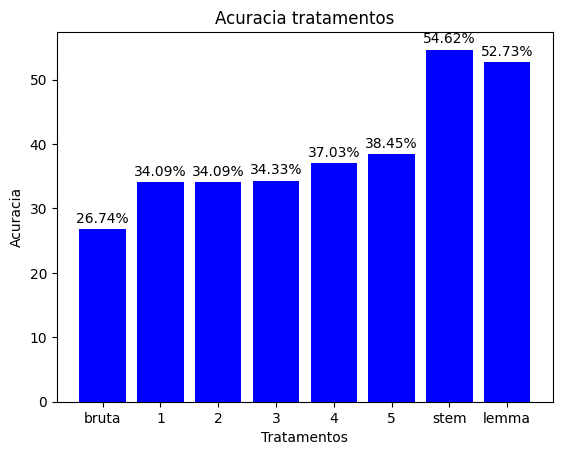

In [100]:
import matplotlib.pyplot as plt

# Dados numéricos
dados = [acuracia_bruta * 100, acuracia_tratamento_1 * 100, acuracia_tratamento2 * 100,
         acuracia_tratamento3 * 100, acuracia_tratamento4 * 100, acuracia_tratamento5 * 100,
         acuracia_tfidf_ngrams * 100,acuracia_lemma * 100]
etiquetas = ['bruta', '1', '2', '3', '4', '5', 'stem','lemma']
 
# Criar o gráfico de barras
plt.bar(etiquetas, dados, color='blue')

# Adicionar título e rótulos dos eixos
plt.title('Acuracia tratamentos')
plt.xlabel('Tratamentos')
plt.ylabel('Acuracia')

# Adicionar os valores acima de cada barra
for i, valor in enumerate(dados):
    plt.text(i, valor + 1, f'{valor:.2f}%', ha='center')

# Exibir o gráfico
plt.show()

# Aplicando o TF-IDF com Ngrams nos dados sem stemizacao e lematizacao no SVC


In [101]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Dividir dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(propostas['tratamento_4'],propostas["Categoria"], test_size=0.2, random_state=42)

# Criar vetorizador TF-IDF com n-grams
vectorizer = TfidfVectorizer(ngram_range=(1, 2))  # Aqui usamos bigrams
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Treinar SVM
svm_model = SVC(kernel='linear')  # Pode usar outros kernels também
svm_model.fit(X_train_tfidf, y_train)

# Prever e avaliar
y_pred = svm_model.predict(X_test_tfidf)
report = classification_report(y_test, y_pred)

print(report)



                                                                precision    recall  f1-score   support

                                      Advocacia-Geral da União       0.00      0.00      0.00         1
                                        Agricultura e Pecuária       1.00      0.07      0.13        14
                                                 Banco Central       0.00      0.00      0.00         4
                                                    Casa Civil       0.00      0.00      0.00         4
                                                       Cidades       0.59      0.44      0.50        55
                                Ciência, Tecnologia e Inovação       0.55      0.19      0.29        31
                                            Comunicação Social       1.00      0.20      0.33         5
                                                  Comunicações       1.00      0.10      0.18        10
                                  Controladoria-Geral da União 

/home/leandro/Documentos/07_ProcessamentoLinguagemNatural/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/leandro/Documentos/07_ProcessamentoLinguagemNatural/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/leandro/Documentos/07_ProcessamentoLinguagemNatural/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` pa

# Aplicando o TF-IDF com Ngrams nos dados com lematizacao no SVC

In [111]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Dividir dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(propostas['tratamento_6'],propostas["Categoria"], test_size=0.2, random_state=42)

# Criar vetorizador TF-IDF com n-grams
vectorizer = TfidfVectorizer(ngram_range=(1, 2))  # Aqui usamos bigrams
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Treinar SVM
svm_model = SVC(kernel='linear')  # Pode usar outros kernels também
svm_model.fit(X_train_tfidf, y_train)

# Prever e avaliar
y_pred = svm_model.predict(X_test_tfidf)
report = classification_report(y_test, y_pred)

print(report)


                                                                precision    recall  f1-score   support

                                      Advocacia-Geral da União       0.00      0.00      0.00         1
                                        Agricultura e Pecuária       1.00      0.14      0.25        14
                                                 Banco Central       0.00      0.00      0.00         4
                                                    Casa Civil       0.00      0.00      0.00         4
                                                       Cidades       0.52      0.47      0.50        55
                                Ciência, Tecnologia e Inovação       0.50      0.19      0.28        31
                                            Comunicação Social       1.00      0.20      0.33         5
                                                  Comunicações       1.00      0.20      0.33        10
                                  Controladoria-Geral da União 

/home/leandro/Documentos/07_ProcessamentoLinguagemNatural/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/leandro/Documentos/07_ProcessamentoLinguagemNatural/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/leandro/Documentos/07_ProcessamentoLinguagemNatural/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` pa

# Aplicando o TF-IDF com Ngrams nos dados com stemizacao no SVC

In [112]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Dividir dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(propostas['tratamento_5'],propostas["Categoria"], test_size=0.2, random_state=42)

# Criar vetorizador TF-IDF com n-grams
vectorizer = TfidfVectorizer(ngram_range=(1, 2))  # Aqui usamos bigrams
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Treinar SVM
svm_model = SVC(kernel='linear')  # Pode usar outros kernels também
svm_model.fit(X_train_tfidf, y_train)

# Prever e avaliar
y_pred = svm_model.predict(X_test_tfidf)
report = classification_report(y_test, y_pred)

print(report)

                                                                precision    recall  f1-score   support

                                      Advocacia-Geral da União       0.00      0.00      0.00         1
                                        Agricultura e Pecuária       1.00      0.14      0.25        14
                                                 Banco Central       0.00      0.00      0.00         4
                                                    Casa Civil       0.00      0.00      0.00         4
                                                       Cidades       0.49      0.38      0.43        55
                                Ciência, Tecnologia e Inovação       0.54      0.23      0.32        31
                                            Comunicação Social       1.00      0.20      0.33         5
                                                  Comunicações       1.00      0.30      0.46        10
                                  Controladoria-Geral da União 

/home/leandro/Documentos/07_ProcessamentoLinguagemNatural/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/leandro/Documentos/07_ProcessamentoLinguagemNatural/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/leandro/Documentos/07_ProcessamentoLinguagemNatural/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` pa